In [66]:
import random
import os
import numpy as np

def seed_everything(seed):
    # Python의 random 모듈 시드 설정
    random.seed(seed)
    
    # OS 환경 변수 PYTHONHASHSEED 설정 (Python의 해시 시드 고정)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    # NumPy의 난수 생성기 시드 설정
    np.random.seed(seed)

# 시드 값 37로 난수 생성기 고정
seed_everything(37)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

data_df = pd.read_csv("../../data/dacon_open/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../data/dacon_open/test.csv", encoding='latin-1')
submission_df = pd.read_csv("../../data/dacon_open/sample_submission.csv", encoding='latin-1')

print(data_df['Y_Class'].value_counts())

total_cnt = data_df.Y_Class.count()
standard_cnt = data_df[data_df['Y_Class'] == 0].Y_Class.count()
under_cnt = data_df[data_df['Y_Class'] == 0].Y_Class.count()
over_cnt = data_df[data_df['Y_Class'] == 2].Y_Class.count()
print('under 비율: {0:.2f}'.format((standard_cnt / total_cnt * 100)))
print('under 비율: {0:.2f}'.format((under_cnt / total_cnt * 100)))
print('over 비율: {0:.2f}'.format((over_cnt / total_cnt * 100)))
print("---------------------------------------------------------")
print('2023: 데이터 세트 Null 값 갯수 ',data_df.isnull().sum().sum())

data_df.describe()

Y_Class
1    407
2    103
0     88
Name: count, dtype: int64
under 비율: 14.72
under 비율: 14.72
over 비율: 17.22
---------------------------------------------------------
2023: 데이터 세트 Null 값 갯수  1172834


,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


# Line

In [130]:
line = ['T010305', 'T010306', 'T050304', 'T050307', 'T100304', 'T100306']

for i in range(len(line)):
    print(f"{line[i]} total: {data_df[data_df['LINE'] == line[i]].shape[0]}")
    print(f"{line[i]}: 0: {data_df[(data_df['Y_Class'] == 0) & (data_df['LINE'] == line[i])].shape[0]} / "
          f"1: {data_df[(data_df['Y_Class'] == 1) & (data_df['LINE'] == line[i])].shape[0]} / "
          f"2: {data_df[(data_df['Y_Class'] == 2) & (data_df['LINE'] == line[i])].shape[0]}")
    total = data_df[data_df['LINE'] == line[i]].shape[0]
    standard = data_df[(data_df['Y_Class'] == 1) & (data_df['LINE'] == line[i])].shape[0]
    print(f"{line[i]} 적합율: {standard / total * 100}", "\n")

T010305 total: 59
T010305: 0: 13 / 1: 35 / 2: 11
T010305 적합율: 59.32203389830508 

T010306 total: 70
T010306: 0: 6 / 1: 37 / 2: 27
T010306 적합율: 52.85714285714286 

T050304 total: 78
T050304: 0: 30 / 1: 37 / 2: 11
T050304 적합율: 47.43589743589743 

T050307 total: 42
T050307: 0: 11 / 1: 9 / 2: 22
T050307 적합율: 21.428571428571427 

T100304 total: 175
T100304: 0: 17 / 1: 144 / 2: 14
T100304 적합율: 82.28571428571428 

T100306 total: 174
T100306: 0: 11 / 1: 145 / 2: 18
T100306 적합율: 83.33333333333334 



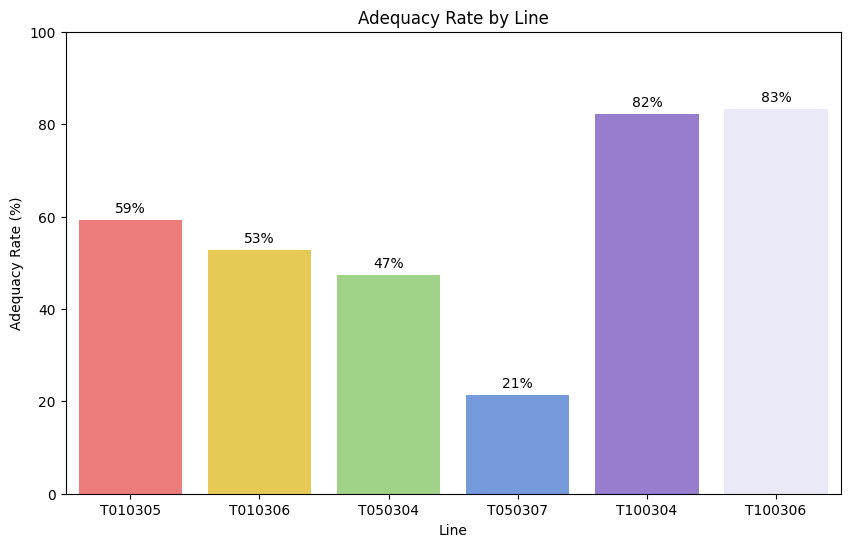

In [131]:
line_names = []
adequacy_rates = []

for i in range(len(line)):
    line_name = line[i]
    total = data_df[data_df['LINE'] == line_name].shape[0]
    class_1 = data_df[(data_df['Y_Class'] == 1) & (data_df['LINE'] == line_name)].shape[0]
    adequacy_rate = (class_1 / total) * 100 if total > 0 else 0
    
    line_names.append(line_name)
    adequacy_rates.append(adequacy_rate)

result_df = pd.DataFrame({
    'Line': line_names,
    'Adequacy Rate': adequacy_rates
})

custom_palette = ["#FF6B6B", "#FFD93D", "#9BDE7C", "#6495ED", "#9370DB", "#E6E6FA"]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Line', y='Adequacy Rate', data=result_df, palette=custom_palette)
plt.title('Adequacy Rate by Line')
plt.ylabel('Adequacy Rate (%)')
plt.xlabel('Line')
plt.ylim(0, 100)


for i, v in enumerate(result_df['Adequacy Rate']):
    ax.text(i, v + 1, f"{v:.0f}%", color='black', ha='center', va='bottom', fontsize=10)

plt.savefig('adequacy_rate_line.png', dpi=300, bbox_inches='tight')
plt.show()

In [134]:
# 전체 데이터에서 NaN 값이 아닌 컬럼 확인
line_df = data_df.drop(['PRODUCT_ID','Y_Class','Y_Quality','TIMESTAMP','PRODUCT_CODE'], axis=1)
not_nan_columns_per_line = line_df.groupby('LINE').apply(lambda x: x.notnull().sum())
not_nan_columns_per_line

,LINE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
LINE,,,,,,,,,,,,,,,,,,,,,
T010305,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T010306,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T050304,78,0,0,0,0,0,0,0,0,0,...,67,67,67,67,67,67,0,0,0,0
T050307,42,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,32,0,0,0,0
T100304,175,175,175,175,175,175,175,175,175,175,...,0,0,0,0,0,0,0,0,0,0
T100306,174,174,174,174,174,174,174,174,174,174,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# 각 LINE별로 NaN 값을 가지는 컬럼 확인
line_df = data_df.drop(['PRODUCT_ID','Y_Class','Y_Quality','TIMESTAMP','PRODUCT_CODE'], axis=1)
nan_columns_per_line = line_df.groupby('LINE').apply(lambda x: x.isnull().sum())
nan_columns_per_line

,LINE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
LINE,,,,,,,,,,,,,,,,,,,,,
T010305,0,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
T010306,0,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
T050304,0,78,78,78,78,78,78,78,78,78,...,11,11,11,11,11,11,78,78,78,78
T050307,0,42,42,42,42,42,42,42,42,42,...,9,9,9,9,9,10,42,42,42,42
T100304,0,0,0,0,0,0,0,0,0,0,...,175,175,175,175,175,175,175,175,175,175
T100306,0,0,0,0,0,0,0,0,0,0,...,174,174,174,174,174,174,174,174,174,174


In [150]:
line_df = line_df[line_df['LINE'] == 'T050304']
not_nan_columns = line_df.columns[line_df.notnull().any()].tolist()
not_nan_columns

['LINE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224',
 'X_225',
 'X_226',
 'X_227',
 'X_228',
 

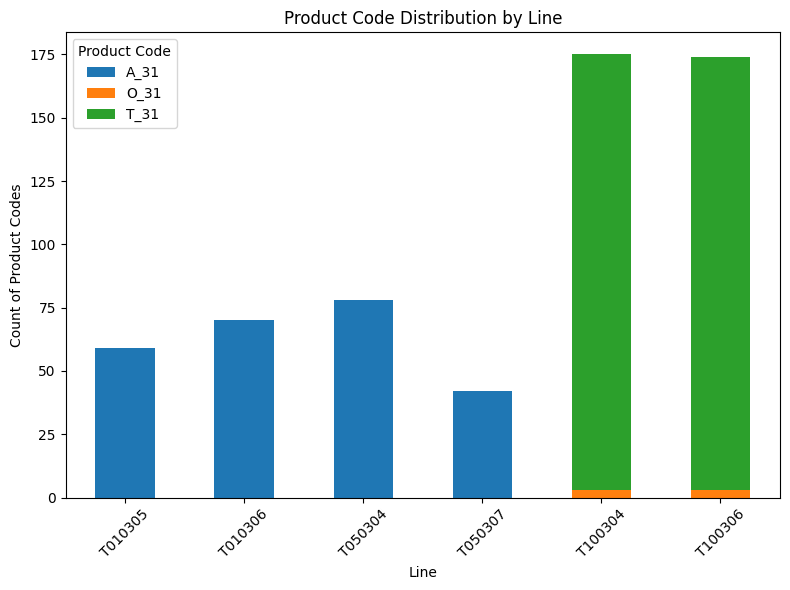

In [125]:
line_product_code_info = data_df.groupby('LINE')['PRODUCT_CODE'].unique()

line_product_code_counts = data_df.groupby(['LINE', 'PRODUCT_CODE']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
line_product_code_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Product Code Distribution by Line')
plt.xlabel('Line')
plt.ylabel('Count of Product Codes')
plt.legend(title='Product Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Line_product_code.png', dpi=300, bbox_inches='tight')
plt.show()

# TIMESTAMP

In [152]:
# 날짜 확인
# from collections import Counter

# data_df['TIMESTAMP'] = pd.to_datetime(data_df['TIMESTAMP']).dt.date
# date_counts = dict(Counter(data_df['TIMESTAMP']))
# for date, count in date_counts.items():
#     print(f"{date}: {count}")

data_only = data_df.copy()
data_only['Date_only'] = pd.to_datetime(data_df['TIMESTAMP']).dt.date

unique_dates_count = data_only['Date_only'].nunique()
print(f"유일한 날짜의 개수: {unique_dates_count}")

유일한 날짜의 개수: 76


In [153]:
from collections import defaultdict

date_lines = defaultdict(set)
for date, line in zip(data_only['Date_only'], data_only['LINE']):
    date_lines[date].add(line)

for date, lines in date_lines.items():
    print(f"{date}: {', '.join(lines)}")

2022-06-13: T050304, T050307
2022-06-14: T050304, T100304
2022-06-16: T050307
2022-06-19: T010305, T010306, T100306, T100304
2022-06-20: T010306
2022-06-21: T010305, T010306, T050304, T050307
2022-06-22: T010305, T010306, T100306, T100304
2022-06-23: T010305, T010306, T100306, T100304
2022-06-24: T010305, T010306, T100306, T100304
2022-06-25: T010305, T050304, T100306, T100304
2022-06-26: T010305, T010306, T100306, T100304
2022-06-27: T010305, T010306
2022-06-29: T010305, T010306
2022-07-01: T050307, T100304, T050304, T010305, T010306
2022-07-02: T010305, T010306, T100306
2022-07-03: T010305, T050304
2022-07-04: T100306, T100304
2022-07-05: T010306, T100304, T100306
2022-07-06: T050304, T100304
2022-07-07: T010305, T010306, T100306, T100304
2022-07-08: T010305, T010306, T100306, T100304
2022-07-09: T010305, T100304
2022-07-10: T100306, T050304, T100304
2022-07-11: T010306, T100306, T100304
2022-07-12: T010306, T100306, T100304
2022-07-13: T100306, T100304
2022-07-14: T010306, T100306, 

In [154]:
data_only['TIMESTAMP'] = pd.to_datetime(data_only['TIMESTAMP']).dt.date

# 적합율 계산
adequacy_rates = data_only.groupby('TIMESTAMP')['Y_Class'].apply(lambda x: (x == 1).mean() * 100).reset_index()

# 컬럼 이름 변경
adequacy_rates.rename(columns={'Y_Class': 'Adequacy Rate'}, inplace=True)

# 결과 출력
adequacy_rates

,TIMESTAMP,Adequacy Rate
0,2022-06-13,52.380952
1,2022-06-14,0.000000
2,2022-06-16,0.000000
3,2022-06-19,66.666667
4,2022-06-20,0.000000
...,...,...
71,2022-09-04,50.000000
72,2022-09-05,0.000000
73,2022-09-06,100.000000
74,2022-09-07,100.000000


In [30]:
from collections import defaultdict

date_lines = defaultdict(set)
date_product = defaultdict(set)
for date, product, line in zip(data_only['Date_only'], data_only['PRODUCT_CODE'], data_only['LINE']):
    date_lines[date].add(line)
    date_product[date].add(product)

for date, lines in date_lines.items():
    lines_str = ', '.join(date_lines[date])
    products_str = ', '.join(date_product[date])
    print(f"{date}: {lines_str}, {products_str}")

2022-06-13: T050304, T050307, A_31
2022-06-14: T050304, T100304, A_31, T_31
2022-06-16: T050307, A_31
2022-06-19: T100306, T100304, T010305, T010306, A_31, T_31
2022-06-20: T010306, A_31
2022-06-21: T010305, T050304, T050307, T010306, A_31
2022-06-22: T100306, T100304, T010305, T010306, A_31, T_31
2022-06-23: T100306, T100304, T010305, T010306, A_31, T_31
2022-06-24: T100306, T100304, T010305, T010306, A_31, T_31
2022-06-25: T100306, T050304, T100304, T010305, A_31, T_31
2022-06-26: T100306, T010305, T100304, T010306, A_31, T_31
2022-06-27: T010305, T010306, A_31
2022-06-29: T010305, T010306, A_31
2022-07-01: T050307, T010306, T050304, T100304, T010305, A_31, T_31
2022-07-02: T100306, T010305, T010306, A_31, T_31
2022-07-03: T010305, T050304, A_31
2022-07-04: T100306, T100304, T_31
2022-07-05: T100306, T100304, T010306, A_31, T_31
2022-07-06: T050304, T100304, A_31, T_31
2022-07-07: T100306, T100304, T010305, T010306, A_31, T_31
2022-07-08: T100306, T100304, T010305, T010306, A_31, T_3

A_31 total: 249
A_31: 0: 60 / 1: 118 / 2: 71
A_31 적합율: 47.389558232931726 

T_31 total: 343
T_31: 0: 28 / 1: 285 / 2: 30
T_31 적합율: 83.09037900874635 

O_31 total: 6
O_31: 0: 0 / 1: 4 / 2: 2
O_31 적합율: 66.66666666666666 



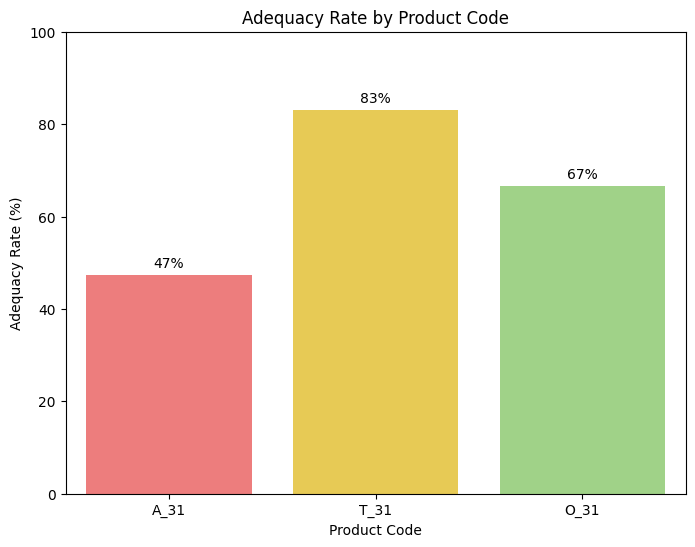

In [161]:
product_code = ['A_31', 'T_31', 'O_31']
adequacy_rates = []

for i in range(len(product_code)):
    print(f"{product_code[i]} total: {data_df[data_df['PRODUCT_CODE'] == product_code[i]].shape[0]}")
    print(f"{product_code[i]}: 0: {data_df[(data_df['Y_Class'] == 0) & (data_df['PRODUCT_CODE'] == product_code[i])].shape[0]} / "
          f"1: {data_df[(data_df['Y_Class'] == 1) & (data_df['PRODUCT_CODE'] == product_code[i])].shape[0]} / "
          f"2: {data_df[(data_df['Y_Class'] == 2) & (data_df['PRODUCT_CODE'] == product_code[i])].shape[0]}")
    total = data_df[data_df['PRODUCT_CODE'] == product_code[i]].shape[0]
    standard = data_df[(data_df['Y_Class'] == 1) & (data_df['PRODUCT_CODE'] == product_code[i])].shape[0]
    adequacy_rates.append(standard/total*100)
    print(f"{product_code[i]} 적합율: {standard / total * 100}", "\n")

result_df = pd.DataFrame({
    'Product Code': product_code,
    'Adequacy Rate': adequacy_rates
})

custom_palette = ["#FF6B6B", "#FFD93D", "#9BDE7C"]
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Product Code', y='Adequacy Rate', data=result_df, palette=custom_palette)
plt.title('Adequacy Rate by Product Code')
plt.ylabel('Adequacy Rate (%)')
plt.xlabel('Product Code')
plt.ylim(0, 100)


for i, v in enumerate(result_df['Adequacy Rate']):
    ax.text(i, v + 1, f"{v:.0f}%", color='black', ha='center', va='bottom', fontsize=10)

plt.savefig('adequacy_rate_Product.png', dpi=300, bbox_inches='tight')
plt.show()

# Y_Quality

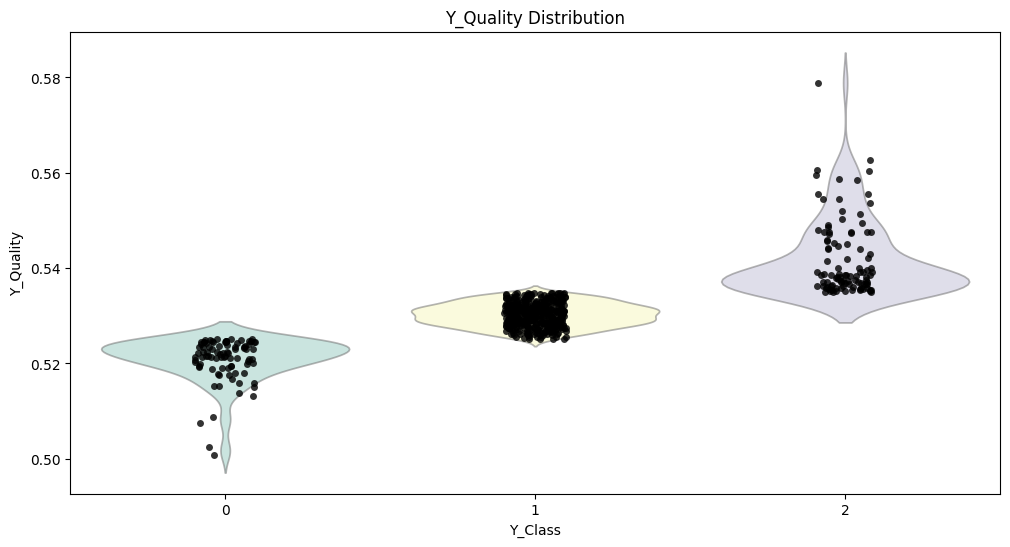

In [169]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Y_Class', y='Y_Quality', data=data_df, palette='Set3', inner=None, alpha=0.5)
sns.stripplot(x='Y_Class', y='Y_Quality', data=data_df, color='black', alpha=0.8, jitter=True)
plt.title('Y_Quality Distribution')
plt.xlabel('Y_Class')
plt.ylabel('Y_Quality')
plt.savefig('Y_Quality_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

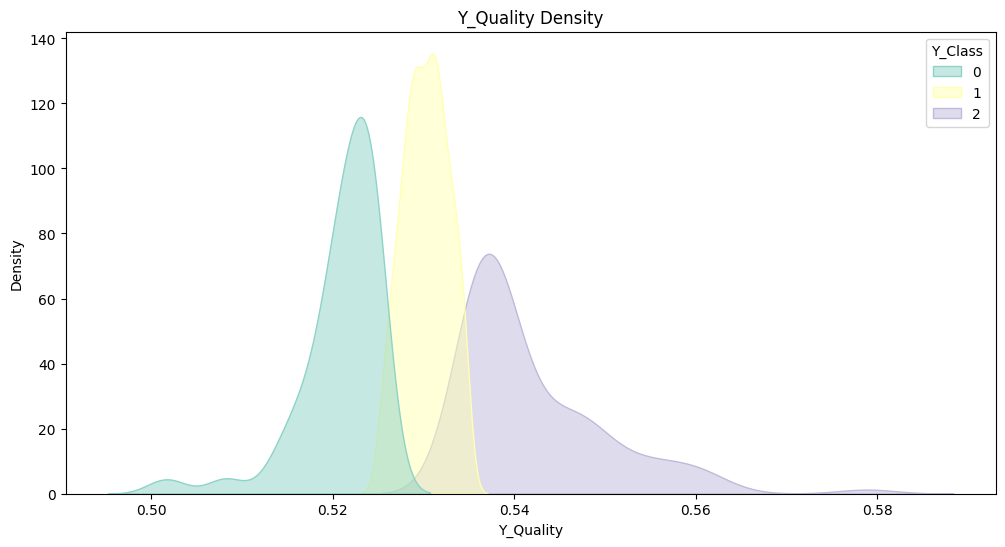

In [170]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_df, x='Y_Quality', hue='Y_Class', fill=True, common_norm=False, palette='Set3', alpha=0.5)
plt.title('Y_Quality Density')
plt.xlabel('Y_Quality')
plt.ylabel('Density')
plt.savefig('Y_Quality_kdeplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
y_df = data_df['Y_Class']
X_df = data_df.drop(['Y_Class'], axis=1)

In [70]:
X_df['TIMESTAMP'] = pd.to_datetime(X_df['TIMESTAMP'])

X_df['Month'] = X_df['TIMESTAMP'].dt.month
X_df['Day'] = X_df['TIMESTAMP'].dt.day

X_df.drop(["TIMESTAMP", "PRODUCT_ID"], axis=1, inplace=True)




predict_df['TIMESTAMP'] = pd.to_datetime(predict_df['TIMESTAMP'])

predict_df['Month'] = predict_df['TIMESTAMP'].dt.month
predict_df['Day'] = predict_df['TIMESTAMP'].dt.day

predict_df.drop(["TIMESTAMP", "PRODUCT_ID"], axis=1, inplace=True)
predict_df.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,Month,Day
0,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
1,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
2,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
3,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
4,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9


In [8]:
X_df.head()

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,Month,Day
0,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN,6,13
1,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN,6,13
2,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN,6,13
3,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN,6,13
4,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN,6,13


In [71]:
all_nan_columns = X_df.columns[X_df.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(all_nan_columns)}")
# print(f"모든 값이 NaN인 컬럼: {all_nan_columns}")
X_df.drop(columns=all_nan_columns, inplace=True)


predict_all_nan_columns = predict_df.columns[predict_df.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(predict_all_nan_columns)}")
# print(f"모든 값이 NaN인 컬럼: {all_nan_columns}")
predict_df.drop(columns=all_nan_columns, inplace=True)

모든 값이 NaN인 컬럼 개수: 82
모든 값이 NaN인 컬럼 개수: 506


In [14]:
X_df.isna().sum(axis=0)

Y_Quality         0
LINE              0
PRODUCT_CODE      0
X_1             249
X_2             249
               ... 
X_2869          498
X_2870          498
X_2871          499
Month             0
Day               0
Length: 2798, dtype: int64

In [7]:
nan_columns = X_df.columns[X_df.isna().any()].tolist()
len(nan_columns)

2793

In [72]:
from sklearn.preprocessing import LabelEncoder

features = ['LINE', 'PRODUCT_CODE']
le = LabelEncoder()
for i in features:
    encoder = LabelEncoder()
    encoder.fit(X_df[i])
    X_df[i] = encoder.transform(X_df[i])
    predict_df[i] = encoder.transform(predict_df[i])

X_df.head()

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day
0,0.533433,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6,13
1,0.541819,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6,13
2,0.531267,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6,13
3,0.537325,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6,13
4,0.531590,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6,13


In [36]:
predict_df.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,Month,Day
0,5,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
1,4,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
2,4,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,444.192308,423.0,NaN,NaN,NaN,NaN,NaN,NaN,9,9
4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,443.211539,423.0,NaN,NaN,NaN,NaN,NaN,NaN,9,9


## NaN 값 처리

### 제거(Removal):
> - NaN 값이 포함된 행이나 열을 완전히 제거하는 방법
> - 데이터 손실이 있을 수 있지만, 간단하고 빠른 방법


### 대체(Imputation):
> - NaN 값을 다른 값으로 대체하는 방법
> - 평균, 중앙값, 최빈값 등으로 대체하는 것이 일반적
> - 데이터의 특성을 고려하여 적절한 대체 방법을 선택야 한다.


### 보간(Interpolation):
> - NaN 값이 있는 지점 주변의 값을 이용하여 NaN 값을 추정하는 방법
> - 선형 보간, 스플라인 보간 등 다양한 보간 기법을 사용할 수 있다.
> - 연속적인 데이터에 효과적


### 모델 기반 대체:
> - 기계 학습 모델을 사용하여 NaN 값을 예측하는 방법
> - 랜덤 포레스트, 선형 회귀 등 다양한 모델을 활용할 수 있다.
> - 데이터의 특성을 잘 반영할 수 있지만, 모델 학습에 시간이 소요된다.

##### 선형 회귀(Linear Regression):
> - 다른 변수들과의 선형 관계를 이용하여 NaN 값을 예측
> - 연속형 변수에 대한 예측에 효과적

##### 랜덤 포레스트(Random Forest):
> - 의사결정 트리 앙상블 모델을 사용하여 NaN 값을 예측
> - 비선형 관계나 복잡한 패턴을 잘 포착할 수 있다.

##### 완전 연결 신경망(Fully Connected Neural Network):
> - 다층 퍼셉트론 구조의 신경망을 이용하여 NaN 값을 예측
> - 복잡한 비선형 관계를 모델링할 수 있다.

##### 협업 필터링(Collaborative Filtering):
> - 유사한 패턴을 가진 데이터 포인트들의 정보를 활용하여 NaN 값을 예측
> - 추천 시스템 분야에서 널리 사용된다.

##### 다중 대체(Multiple Imputation):
> - NaN 값을 여러 번 대체하여 다수의 대체 데이터셋을 생성
> - 이후 각 대체 데이터셋에 대해 분석을 수행하고, 결과를 종합


### 데이터 증강:
> - 결측값 처리와 함께 데이터 증강 기법을 사용하여 모델의 일반화 성능을 높일 수 있다.
> - 합성 데이터 생성, 노이즈 추가 등의 방법을 활용할 수 있다.

In [73]:
missing_ratio = X_df.isnull().mean()
missing_ratio

Y_Quality       0.000000
LINE            0.000000
PRODUCT_CODE    0.000000
X_1             0.416388
X_2             0.416388
                  ...   
X_2869          0.832776
X_2870          0.832776
X_2871          0.834448
Month           0.000000
Day             0.000000
Length: 2798, dtype: float64

In [74]:
columns_to_drop = missing_ratio[missing_ratio > 0.7].index
columns_to_drop

Index(['X_92', 'X_93', 'X_94', 'X_95', 'X_104', 'X_113', 'X_114', 'X_115',
       'X_124', 'X_125',
       ...
       'X_2840', 'X_2841', 'X_2842', 'X_2843', 'X_2866', 'X_2867', 'X_2868',
       'X_2869', 'X_2870', 'X_2871'],
      dtype='object', length=1393)

In [75]:
X_df = X_df.drop(columns_to_drop, axis=1)
X_df

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Month,Day
0,0.533433,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0,6,13
1,0.541819,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0,6,13
2,0.531267,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.365517,104.0,193.4,179.820690,165.5,383.0,367.320755,353.0,6,13
3,0.537325,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.082759,94.5,190.3,181.920690,165.8,384.0,369.188679,353.0,6,13
4,0.531590,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.526546,5,2,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8
594,0.524022,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0,9,8
595,0.521289,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0,9,8
596,0.531375,4,1,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8


In [76]:
predict_df = predict_df.drop(columns_to_drop, axis=1)
predict_df

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Month,Day
0,5,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
1,4,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
2,4,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.739286,149.9,198.0,191.450000,183.8,467.0,444.192308,423.0,9,9
4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
306,4,2,2.0,96.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
307,5,2,2.0,91.0,0.0,45.0,10.0,0.0,50.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
308,5,2,2.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5


In [77]:
# 각 컬럼의 결측치 비율 계산
missing_ratio = X_df.isnull().mean()

# NaN 값이 있는 컬럼 확인
nan_columns = missing_ratio[missing_ratio > 0].index
nan_columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       ...
       'X_2856', 'X_2857', 'X_2858', 'X_2859', 'X_2860', 'X_2861', 'X_2862',
       'X_2863', 'X_2864', 'X_2865'],
      dtype='object', length=1400)

In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(X_df)

# DataFrame으로 변환
X_df = pd.DataFrame(data_imputed, columns=X_df.columns)

print("결측치를 평균으로 대체한 데이터프레임:")
X_df

결측치를 평균으로 대체한 데이터프레임:


,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Month,Day
0,0.533433,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,131.646667,115.400000,209.000000,197.286667,189.000000,383.000000,368.296296,353.000000,6.0,13.0
1,0.541819,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,128.748276,119.700000,198.000000,193.296552,185.600000,383.000000,367.735849,353.000000,6.0,13.0
2,0.531267,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,115.365517,104.000000,193.400000,179.820690,165.500000,383.000000,367.320755,353.000000,6.0,13.0
3,0.537325,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,112.082759,94.500000,190.300000,181.920690,165.800000,384.000000,369.188679,353.000000,6.0,13.0
4,0.531590,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,138.066667,109.700000,208.600000,196.393333,182.600000,383.000000,367.351852,352.000000,6.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.526546,5.0,2.0,2.000000,95.000000,0.0,45.0,10.00000,0.0,50.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,9.0,8.0
594,0.524022,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,159.527586,144.200000,198.300000,180.810345,168.700000,384.000000,369.811321,353.000000,9.0,8.0
595,0.521289,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,178.248276,159.600000,186.500000,176.486207,156.600000,383.000000,367.018868,352.000000,9.0,8.0
596,0.531375,4.0,1.0,40.000000,94.000000,0.0,45.0,11.00000,0.0,45.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,9.0,8.0


In [79]:
predict_df['Y_Quality'] = 0  # 예측 데이터셋에서 임시로 0으로 설정

# 피처 순서를 학습 데이터셋과 일치시키기 위해 predict_df의 컬럼 순서 재정렬
predict_df = predict_df[X_df.columns]
predict_df

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Month,Day
0,0,5,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
1,0,4,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
2,0,4,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9
3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.739286,149.9,198.0,191.450000,183.8,467.0,444.192308,423.0,9,9
4,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,5,2,2.0,91.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
306,0,4,2,2.0,96.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
307,0,5,2,2.0,91.0,0.0,45.0,10.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5
308,0,5,2,2.0,95.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5


In [80]:
data_imputed = imputer.transform(predict_df)

# DataFrame으로 변환
predict_df = pd.DataFrame(data_imputed, columns=predict_df.columns)

print("결측치를 평균으로 대체한 데이터프레임:")
predict_df

결측치를 평균으로 대체한 데이터프레임:


,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Month,Day
0,0.0,5.0,2.0,2.000000,94.000000,0.0,45.0,10.00000,0.0,51.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,9.0,9.0
1,0.0,4.0,2.0,2.000000,93.000000,0.0,45.0,11.00000,0.0,45.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,9.0,9.0
2,0.0,4.0,2.0,2.000000,95.000000,0.0,45.0,11.00000,0.0,45.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,9.0,9.0
3,0.0,0.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,179.739286,149.900000,198.000000,191.450000,183.800000,467.000000,444.192308,423.000000,9.0,9.0
4,0.0,1.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,...,190.664286,162.400000,210.200000,193.082143,179.700000,465.000000,443.211539,423.000000,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,5.0,2.0,2.000000,91.000000,0.0,45.0,10.00000,0.0,51.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,11.0,5.0
306,0.0,4.0,2.0,2.000000,96.000000,0.0,45.0,11.00000,0.0,45.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,11.0,5.0
307,0.0,5.0,2.0,2.000000,91.000000,0.0,45.0,10.00000,0.0,50.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,11.0,5.0
308,0.0,5.0,2.0,2.000000,95.000000,0.0,45.0,10.00000,0.0,51.000000,...,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,11.0,5.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# IterativeImputer 생성
imputer = IterativeImputer(max_iter=10, random_state=42)

# 학습 데이터로 보간기 학습
imputer.fit(X_train)


batch_size = 150

def batch_impute(imputer, data, batch_size):
    imputed_data = []
    for start in range(0, len(data), batch_size):
        end = start + batch_size
        batch = data[start:end]
        imputed_batch = imputer.transform(batch)
        imputed_data.append(imputed_batch)
    return np.vstack(imputed_data)


# 배치로 학습 데이터의 결측치 보간
train_data_imputed = batch_impute(imputer, X_train, batch_size)

# 배치로 테스트 데이터의 결측치 보간
test_data_imputed = batch_impute(imputer, X_test, batch_size)

# 보간된 데이터프레임으로 변환
train_data_imputed_df = pd.DataFrame(train_data_imputed, columns=X_df.columns)
test_data_imputed_df = pd.DataFrame(test_data_imputed, columns=X_df.columns)


predict_data_imputed = imputer.transform(predict_df)
predict_data_imputed_df = pd.DataFrame(predict_data_imputed, columns=predict_df.columns)
predict_data_imputed_df

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter

# 노이즈 인스턴스: 동일한 특징을 가지지만 서로 다른 클래스 레이블을 가진 것

def find_noise_instances(df):
    # 중복된 인스턴스들을 모두 찾기 (레이블을 제외한 모든 열)
    # 지정된 열을 기준으로 중복된 행을 찾는다. / keep=False는 모든 중복된 행을 반환해 중복된 행들이 duplicates 데이터프레임에 저장된다.
    duplicates = df[df.duplicated(subset=df.columns[:-1], keep=False)]
    
    # 중복된 인스턴스들 중에서 클래스 레이블까지 완전히 동일한 경우는 제거
    # keep=False를 사용하여 완전히 동일한 행도 중복으로 간주하여 제거하지 않는다. -> 레이블이 다른 경우가 noise 데이터프레임에 저장
    # noise = duplicates[duplicates.duplicated(subset=df.columns[:-1], keep=False)]
    # return noise
    return duplicates



noise_instances = find_noise_instances(cust_df)


X = cust_df.drop(noise_instances.index)


partitions = np.array_split(X, 5)
models = []
predictions = []

for i in range(5):
    # range(5)를 사용하여 0부터 4까지의 인덱스를 반복하면서, 현재 검증용 파티션의 인덱스 i를 제외한 파티션들을 선택
    # i가 2라면 j != i 조건에 의해 인덱스 2가 아닌 모든 파티션(즉, partitions[0], partitions[1], partitions[3], partitions[4])이 선택
    # 선택된 파티션들을 pd.concat 함수를 사용하여 하나의 데이터프레임으로 결합 / 검증용 파티션을 제외한 나머지 데이터가 모두 합쳐져서 train_df으로 만든다.
    train_df = pd.concat([partitions[j] for j in range(5) if j != i])
    val_df = partitions[i] # i에 해당하는 파티션을 선택 -> 검증용 데이터로 사용
    
    
    X_train = train_df.drop('TARGET', axis=1)
    y_train = train_df['TARGET']
    X_val = val_df.drop('TARGET', axis=1)
    y_val = val_df['TARGET']
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    models.append(('xgb' + str(i), xgb))


vo_clf = VotingClassifier(estimators=models, voting='soft')
X_clean = X.drop('TARGET', axis=1)
y_clean = X['TARGET']
vo_clf.fit(X_clean, y_clean)


# 노이즈 인스턴스 예측
X_noise = noise_instances.drop('TARGET', axis=1)
noise_predictions = vo_clf.predict(X_noise)


cust_df.loc[noise_instances.index, 'TARGET'] = noise_predictions

# 결과 확인
cust_df

In [81]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators=50, 
    max_samples=50, 
    contamination=float(0.004), 
    max_features=1.0, 
    bootstrap=False, 
    n_jobs=-1, 
    random_state=None, 
    verbose=0
)

# 모델 학습
clf.fit(X_df)
pred = clf.predict(X_df)


# 예측 결과를 데이터프레임에 추가
X_df['anomaly'] = pred


# 이상치 데이터 추출 / 1=정상, -1=이상치
outliers = X_df.loc[X_df['anomaly'] == -1]
outlier_index = list(outliers.index)


# 이상치와 정상치 개수 출력
print(X_df['anomaly'].value_counts()) 

anomaly
 1    595
-1      3
Name: count, dtype: int64


In [92]:
# 이상치를 제외한 데이터 추출
X = X_df.loc[X_df['anomaly'] != -1]
X = X_df.drop(outlier_index)
print(X.shape)
X = X.drop(columns=['anomaly'])

# y에서도 이상치 인덱스 제거
y = y_df.drop(outlier_index)

# predict_df.drop('ID', axis=1, inplace=True)

(595, 1406)


In [91]:
X.shape

(598, 1405)

In [85]:
sc = StandardScaler()
X = sc.fit_transform(X)
print('피처 데이터 shape:{0}'.format(X.shape))

predict_df = sc.transform(predict_df)
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(598, 1405)
피처 데이터 shape:(310, 1405)


In [86]:
X.shape, y.shape

((598, 1405), (595,))

In [93]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_3, y_3 = smoteto.fit_resample(X, y)

print('피처 데이터 shape:{0}'.format(X_3.shape))
print('피처 데이터 shape:{0}'.format(y_3.shape))
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(1182, 1405)
피처 데이터 shape:(1182,)
피처 데이터 shape:(310, 1405)


In [ ]:
# 모든 feature를 사용하여 중복된 행 식별
duplicates = X.duplicated(keep=False)
duplicate_instances = X[duplicates]

# 중복 인스턴스와 해당 레이블을 합치기
duplicate_instances_with_labels = duplicate_instances.copy()
duplicate_instances_with_labels['label'] = y[duplicates].values

# 중복 인스턴스 중 서로 다른 클래스 레이블을 가진 것 찾기
conflicting_duplicates = duplicate_instances_with_labels.groupby(list(X.columns)).filter(lambda x: len(x['label'].unique()) > 1)


print("Conflicting duplicates:")
print(conflicting_duplicates)


# 노이즈 인스턴스 제거
conflicting_indices = conflicting_duplicates.index
c_X = X.drop(conflicting_indices)
c_y = y.drop(conflicting_indices)

print("Cleaned feature DataFrame:")
print(c_X)